In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")
import datetime
np.random.seed(42)

In [2]:
plt.style.use("ggplot")

In [3]:
df = pd.read_excel("C:/Users/Lenovo/Customer Lifetime Value Analysis/online_retail_II.xlsx", sheet_name= ["Year 2009-2010", "Year 2010-2011"])

In [4]:
df1 = df["Year 2009-2010"]
df2 = df["Year 2010-2011"]

In [5]:
df1.shape, df2.shape

((525461, 8), (541910, 8))

In [6]:
sum([df1.shape[0], df2.shape[0]])

1067371

In [7]:
data = pd.concat([df1, df2])

In [8]:
data.head(5)

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [9]:
data.shape

(1067371, 8)

In [10]:
data.isnull().sum()/data.shape[0]*100

Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.766873
Country         0.000000
dtype: float64

In [11]:
# first drop the rows where the description is null
data.dropna(axis=0, subset = ["Description"], inplace=True)

In [12]:
data.isnull().sum() 

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    238625
Country             0
dtype: int64

In [13]:
# Now lets check the data before droping these customer ID's
data[data["Customer ID"].isnull()]

Invoice StockCode                     Description  Quantity  \
263     489464     21733                    85123a mixed       -96   
283     489463     71477                           short      -240   
284     489467    85123A                     21733 mixed      -192   
577     489525    85226C       BLUE PULL BACK RACING CAR         1   
578     489525     85227     SET/6 3D KIT CARDS FOR KIDS         1   
...        ...       ...                             ...       ...   
541536  581498    85099B         JUMBO BAG RED RETROSPOT         5   
541537  581498    85099C  JUMBO  BAG BAROQUE BLACK WHITE         4   
541538  581498     85150   LADIES & GENTLEMEN METAL SIGN         1   
541539  581498     85174               S/4 CACTI CANDLES         1   
541540  581498       DOT                  DOTCOM POSTAGE         1   

               InvoiceDate    Price  Customer ID         Country  
263    2009-12-01 10:52:00     0.00          NaN  United Kingdom  
283    2009-12-01 10:52:00     0.00          NaN  United Kingdom  
284    2009-12-01 10:53:00     0.00          NaN  United Kingdom  
577    2009-12-01 11:49:00     0.55          NaN  United Kingdom  
578    2009-12-01 11:49:00     0.85          NaN  United Kingdom  
...                    ...      ...          ...             ...  
541536 2011-12-09 10:26:00     4.13          NaN  United Kingdom  
541537 2011-12-09 10:26:00     4.13          NaN  United Kingdom  
541538 2011-12-09 10:26:00     4.96          NaN  United Kingdom  
541539 2011-12-09 10:26:00    10.79          NaN  United Kingdom  
541540 2011-12-09 10:26:00  1714.17          NaN  United Kingdom  

[238625 rows x 8 columns]

In [14]:
data.iloc[575:, :]

Invoice StockCode                      Description  Quantity  \
576     C489524     21258       VICTORIAN SEWING BOX LARGE        -1   
577      489525    85226C        BLUE PULL BACK RACING CAR         1   
578      489525     85227      SET/6 3D KIT CARDS FOR KIDS         1   
579      489526    85049E        SCANDINAVIAN REDS RIBBONS        12   
580      489526     21976   PACK OF 60 MUSHROOM CAKE CASES        24   
...         ...       ...                              ...       ...   
541905   581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906   581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907   581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908   581587     22138    BAKING SET 9 PIECE RETROSPOT          3   
541909   581587      POST                          POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  
576    2009-12-01 11:48:00  12.75      15614.0  United Kingdom  
577    2009-12-01 11:49:00   0.55          NaN  United Kingdom  
578    2009-12-01 11:49:00   0.85          NaN  United Kingdom  
579    2009-12-01 11:50:00   1.25      12533.0         Germany  
580    2009-12-01 11:50:00   0.55      12533.0         Germany  
...                    ...    ...          ...             ...  
541905 2011-12-09 12:50:00   2.10      12680.0          France  
541906 2011-12-09 12:50:00   4.15      12680.0          France  
541907 2011-12-09 12:50:00   4.15      12680.0          France  
541908 2011-12-09 12:50:00   4.95      12680.0          France  
541909 2011-12-09 12:50:00  18.00      12680.0          France  

[1062414 rows x 8 columns]

In [15]:
# We have to drop the rows where customer ID is null because it's unique customer ID of each customer
# So it is better to drop rather than imputing it with same random value

data.dropna(axis=0, subset=["Customer ID"], inplace=True)

In [16]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [17]:
data.head(10)

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5  489434     22064           PINK DOUGHNUT TRINKET POT         24   
6  489434     21871                  SAVE THE PLANET MUG        24   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8  489435     22350                            CAT BOWL         12   
9  489435     22349       DOG BOWL , CHASING BALL DESIGN        12   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
5 2009-12-01 07:45:00   1.65      13085.0  United Kingdom  
6 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
7 2009-12-01 07:45:00   5.95      13085.0  United Kingdom  
8 2009-12-01 07:46:00   2.55      13085.0  United Kingdom  
9 2009-12-01 07:46:00   3.75      13085.0  United Kingdom

In [18]:
temp_df = pd.DataFrame(data["Country"].value_counts())

In [19]:
temp_df.head(10)

Country
United Kingdom   741301
Germany           17624
EIRE              16195
France            14202
Netherlands        5140
Spain              3811
Belgium            3123
Switzerland        3064
Portugal           2504
Australia          1913

In [20]:
names = temp_df.index

In [21]:
px.scatter(temp_df, y="Country", color=names, title="Count of Countries")

As you can see the **United Kingdom** has maximum transcation as compared to other countries.

In [22]:
# Now lets check the total quantity by country
data.groupby("Country").sum()["Quantity"].sort_values(ascending= False).head(10)

Country
United Kingdom    8353502
Netherlands        381951
EIRE               313373
Denmark            235218
Germany            224581
France             183339
Australia          103706
Sweden              87737
Switzerland         51831
Spain               45156
Name: Quantity, dtype: int64

In [23]:
px.scatter(data.iloc[:, [5,7]].groupby(["Country"]).mean(),
          y="Price", size="Price", title="Average Price by Country", opacity = 0.48)

From the above dot plot we can conclude the **Singapore** has the highest average price followed by the **Norway** and **Malta**.

In [24]:
Countries = data["Country"].unique()

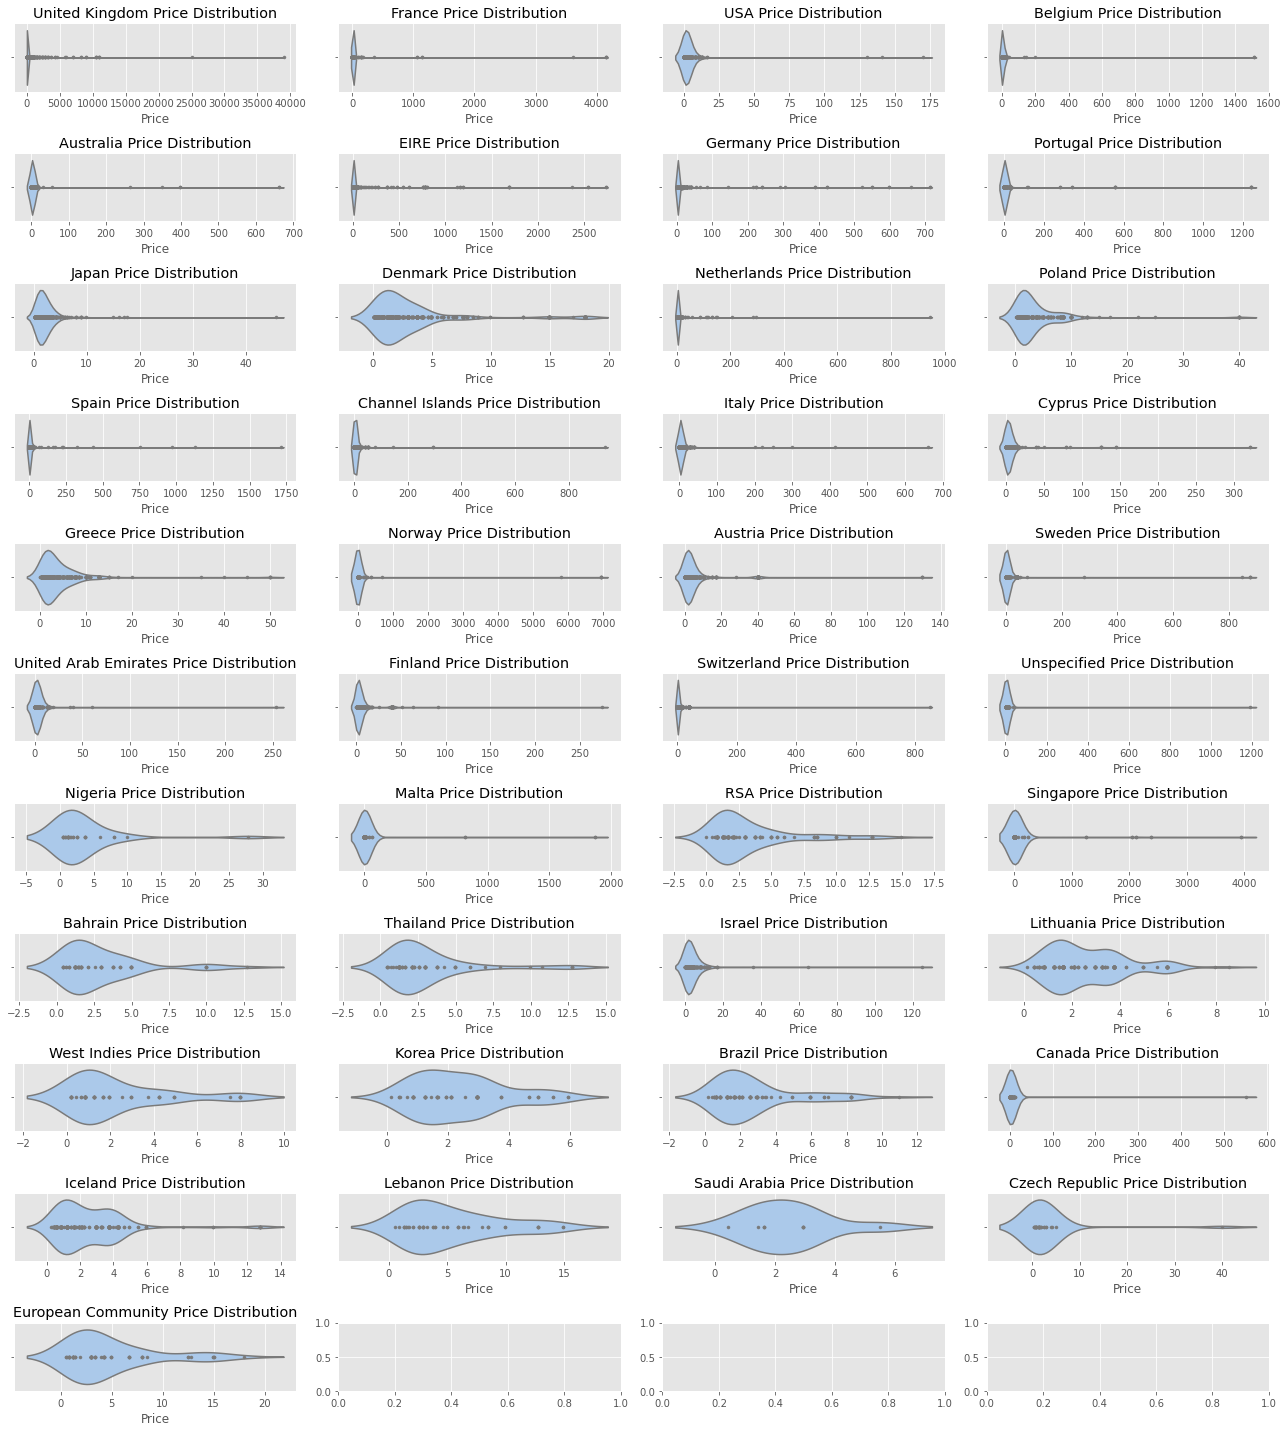

In [25]:
fig, ax = plt.subplots(11,4, figsize=(18,20))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i, c in enumerate(Countries):
    sns.violinplot(x="Price", data=data[data["Country"] == c], ax = axes_[i], inner = "point", palette = "pastel")
    axes_[i].set_title(c + ' ' + "Price Distribution")
    plt.tight_layout()

From the above plot what i can interpret is that most of the data is pretty skewed and there is lot's of high extreme values that are present in the data.

In [26]:
# Total number of unique Invoices
len(data["Invoice"].unique())

44876

In [27]:
temp_invoice_df = data.groupby("Invoice").sum()

In [28]:
temp_invoice_df.reset_index(inplace=True)

In [29]:
# Here are the top 30 invoices with total quantity purchased by them
temp_invoice_df.sort_values(by = "Quantity", ascending=False).head(30).iloc[:,:2].style.background_gradient(cmap="Blues")

In [30]:
data.groupby(["Invoice"]).mean().head(15).iloc[:,[1]].sort_values("Price", ascending=False)

Price
Invoice            
489444   141.000000
489447   130.000000
489434     4.081250
489436     3.730526
489437     3.628261
489439     3.560000
489440     3.150000
489446     3.118519
489441     3.042500
489448     2.970000
489435     2.625000
489438     2.591176
489445     2.477895
489443     2.370000
489442     2.040870

I have grouped the data by invoice to see the average spend by Invoice Number. Here one thing interesting to see that the invoice with number **489444** & **489447** has outspent others. So to gain some better clarity, lets check these 2 invoices and get insighta on how much quantity they have purchased so far.

In [31]:
data[(data["Invoice"] == 489444) | (data["Invoice"] == 489447)]

Invoice StockCode Description  Quantity         InvoiceDate  Price  \
126  489444      POST     POSTAGE         1 2009-12-01 09:55:00  141.0   
173  489447      POST     POSTAGE         1 2009-12-01 10:10:00  130.0   

     Customer ID  Country  
126      12636.0      USA  
173      12362.0  Belgium

As you can see above, These 2 invoice with invoice number **489444** and **489447** had only single transaction, that's why the average price was too high.

### Initial  EDA Insights:
- Most of the customers are from the United Kingdom followed by the Germany, EIRE & France.
- if we check the average price sale by countries, what we have observed is that Singapore has the highest average price sale followed by the Norway and Malta.
- Most of the countries data is skewed when it comes to the Price feature with lots of higher extreme values. 
- There are total 44876 uinques purchased happened so far.
- We have also observed some of the Invoice who have purchased most of the quantities within 2 year of span.
- When it comes to the average spend there are 2 invoices with the number 489444 and 489447 having the highest average spent but upon inspection we also fount the average product purchase was only 1 which is from USA followed by Belgium.

In [32]:
# Lets look at the data once again & see what else insights we can  get from the data itself
data.head(15)

Invoice StockCode                          Description  Quantity  \
0   489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1   489434    79323P                   PINK CHERRY LIGHTS        12   
2   489434    79323W                  WHITE CHERRY LIGHTS        12   
3   489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4   489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5   489434     22064           PINK DOUGHNUT TRINKET POT         24   
6   489434     21871                  SAVE THE PLANET MUG        24   
7   489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8   489435     22350                            CAT BOWL         12   
9   489435     22349       DOG BOWL , CHASING BALL DESIGN        12   
10  489435     22195         HEART MEASURING SPOONS LARGE        24   
11  489435     22353   LUNCHBOX WITH CUTLERY FAIRY CAKES         12   
12  489436    48173C                DOOR MAT BLACK FLOCK         10   
13  489436     21755             LOVE BUILDING BLOCK WORD        18   
14  489436     21754             HOME BUILDING BLOCK WORD         3   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
5  2009-12-01 07:45:00   1.65      13085.0  United Kingdom  
6  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
7  2009-12-01 07:45:00   5.95      13085.0  United Kingdom  
8  2009-12-01 07:46:00   2.55      13085.0  United Kingdom  
9  2009-12-01 07:46:00   3.75      13085.0  United Kingdom  
10 2009-12-01 07:46:00   1.65      13085.0  United Kingdom  
11 2009-12-01 07:46:00   2.55      13085.0  United Kingdom  
12 2009-12-01 09:06:00   5.95      13078.0  United Kingdom  
13 2009-12-01 09:06:00   5.45      13078.0  United Kingdom  
14 2009-12-01 09:06:00   5.95      13078.0  United Kingdom

<AxesSubplot:xlabel='Description'>

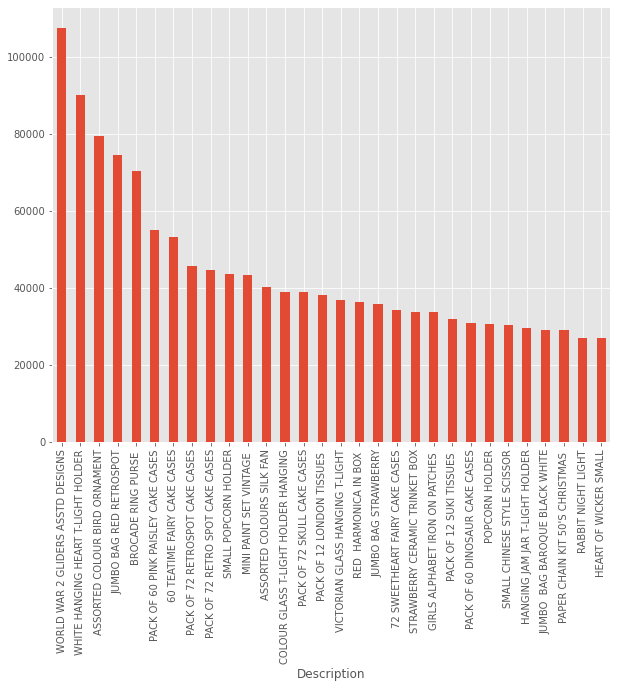

In [33]:
# Lets check which product has been purchased more often so far
plt.figure(figsize=(10,8))
data.groupby("Description").sum().sort_values(by = "Quantity", ascending=False).head(30)["Quantity"].plot(kind="bar")

In [34]:
temp_data = data.copy()

In [35]:
temp_data.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [36]:
# Date Time Analysis
temp_data.loc[:, "Month"] = data.InvoiceDate.dt.month
temp_data.loc[:, "Time"] = data.InvoiceDate.dt.time
temp_data.loc[:, "Year"] = data.InvoiceDate.dt.year
temp_data.loc[:, "Day"] = data.InvoiceDate.dt.day
temp_data.loc[:, "Quarter"] = data.InvoiceDate.dt.quarter
temp_data.loc[:, "Day of Week"] = data.InvoiceDate.dt.dayofweek

In [37]:
# Mapping day of week
dayofweek_mapping = dict({0: "Monday",
                         1: "Tuesday",
                         2: "Wednesday",
                         3: "Thursday",
                         4: "Friday",
                         5: "Saturday",
                         6: "Sunday"})

In [38]:
temp_data["Day of Week"] = temp_data["Day of Week"].map(dayofweek_mapping)

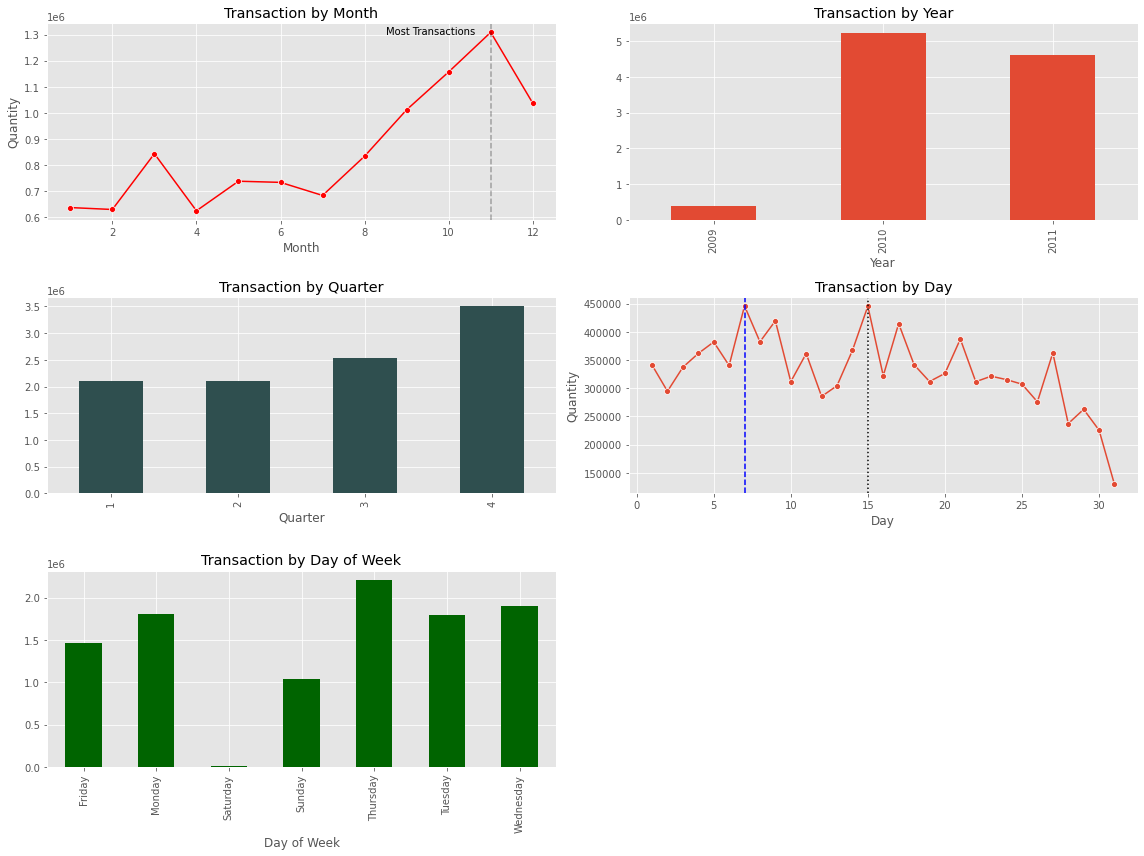

In [39]:
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.lineplot(x = "Month", y = "Quantity", data = temp_data.groupby("Month").sum("Quantity"), marker = "o", color = "red" )
plt.axvline(11, color = "k", linestyle = '--', alpha = 0.3)
plt.text(8.50, 1.3e6, "Most Transactions")
plt.title("Transaction by Month")
plt.subplot(3,2,2)
temp_data.groupby("Year").sum()["Quantity"].plot(kind = "bar")
plt.title("Transaction by Year")
plt.subplot(3,2,3)
temp_data.groupby("Quarter").sum()["Quantity"].plot(kind = "bar", color = "darkslategray")
plt.title("Transaction by Quarter")
plt.subplot(3,2,4)
sns.lineplot(x = "Day", y = "Quantity", data = temp_data.groupby("Day").sum("Quantity"), marker = "o")
plt.axvline(7, color = 'b', linestyle = '--')
plt.axvline(15, color='k', linestyle = "dotted")
plt.title("Transaction by Day")
plt.subplot(3,2,5)
temp_data.groupby("Day of Week").sum()["Quantity"].plot(kind = "bar", color = "darkgreen")
plt.title("Transaction by Day of Week")
plt.tight_layout()
plt.show()

As we can see, in 2009 the transaction is quite low as compared to 2010 and 2011. But as if now, we don't know the reason behind this so let's investigate why 2009 is low as compared to other 2 year.

In [40]:
print("Total Number of Countries in 2009 : {}".format(len(temp_data[temp_data["Year"] == 2009]["Country"].unique())))
print("Total Number of Transaction in 2009 : {}".format(temp_data[temp_data["Year"] == 2009]["Quantity"].sum()))
print("-----------------------------------------------------------------------------------------------")
print("Total Number of Countries in 2010 : {}".format(len(temp_data[temp_data["Year"] == 2010]["Country"].unique())))
print("Total Number of Transaction in 2010 : {}".format(temp_data[temp_data["Year"] == 2010]["Quantity"].sum()))
print("-----------------------------------------------------------------------------------------------")
print("Total Number of Countries in 2011 : {}".format(len(temp_data[temp_data["Year"] == 2011]["Country"].unique())))
print("Total Number of Transaction in 2011 : {}".format(temp_data[temp_data["Year"] == 2011]["Quantity"].sum()))
print("-----------------------------------------------------------------------------------------------")

Total Number of Countries in 2009 : 23
Total Number of Transaction in 2009 : 390286
-----------------------------------------------------------------------------------------------
Total Number of Countries in 2010 : 37
Total Number of Transaction in 2010 : 5233315
-----------------------------------------------------------------------------------------------
Total Number of Countries in 2011 : 36
Total Number of Transaction in 2011 : 4610527
-----------------------------------------------------------------------------------------------


Through this analysis what conclusion we can make is that may be the company has started their operations in other countries and started to expand their business further.

In [41]:
_2009 = temp_data[temp_data["Year"] == 2009]["Country"].unique()
_2010 = temp_data[temp_data["Year"] == 2010]["Country"].unique()
_2011 = temp_data[temp_data["Year"] == 2011]["Country"].unique()

In [42]:
no_cols = []

for i in (_2010):
        if i not in _2009:
            no_cols.append(i)
print("These are the values which are not present in 2009: {}".format(no_cols))

These are the values which are not present in 2009: ['Unspecified', 'Nigeria', 'Malta', 'RSA', 'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland']


In [43]:
temp = data.groupby(["Country", "Description"]).sum()["Quantity"]

In [44]:
temp = pd.DataFrame(temp)

## Top 8 Countries with Most Transactions

In [45]:
top_8_countries = ["United Kingdom", "Netherlands", "EIRE", "Denmark", "Germany", "France", "Australia", "Sweden"]

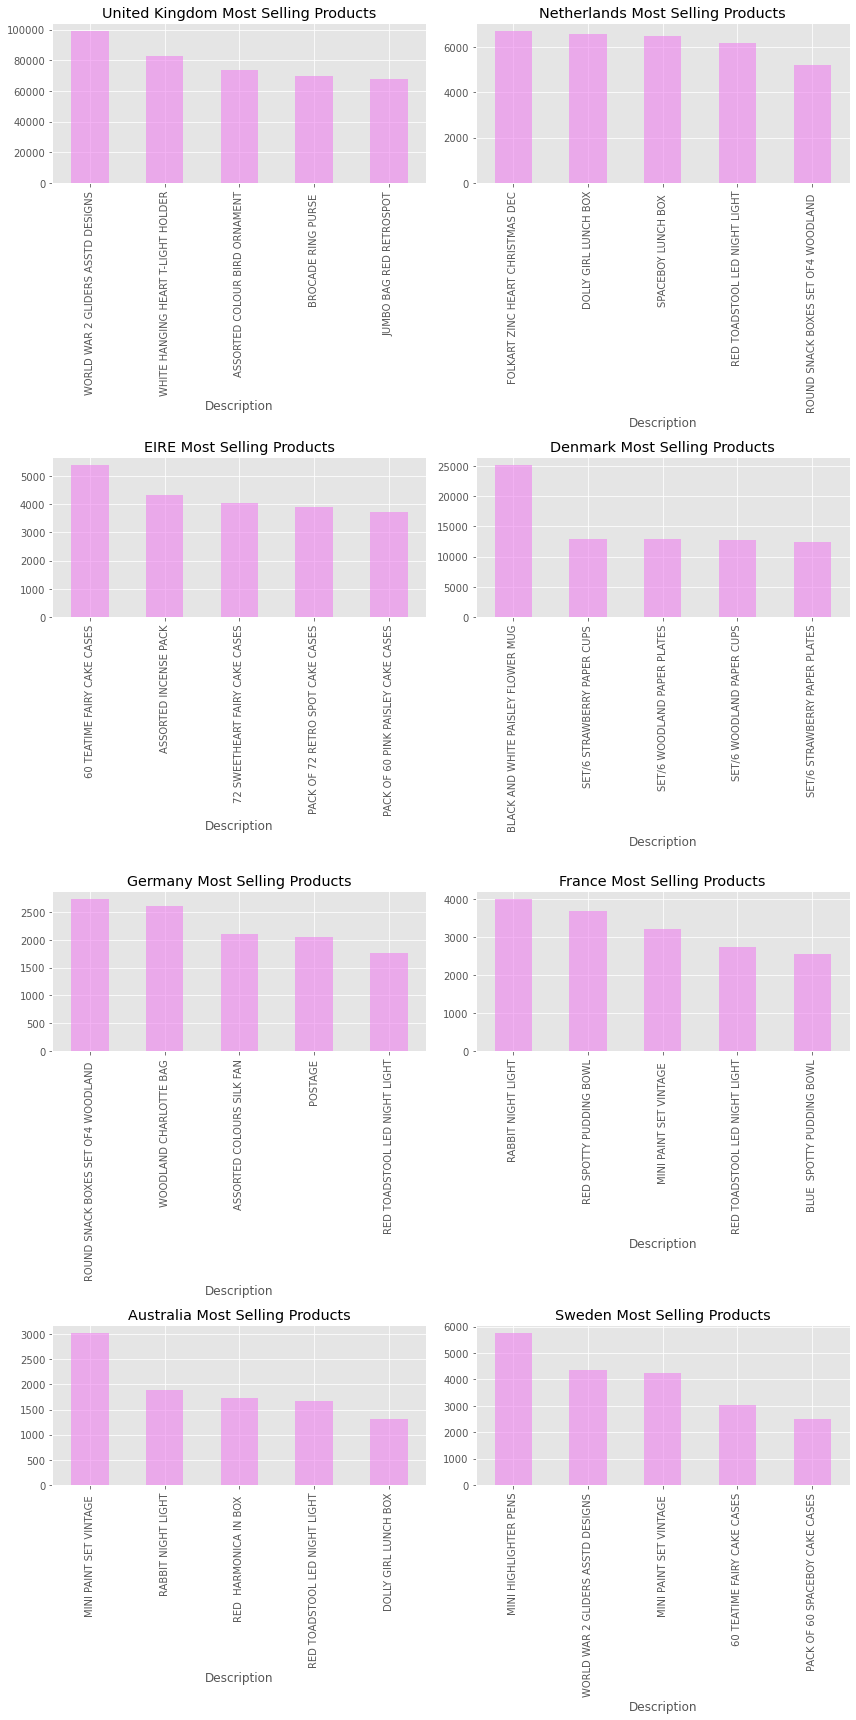

In [46]:
x = 1
plt.figure(figsize=(12,24))

for x, c in enumerate(top_8_countries):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' ' + "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color ="violet", 
                                                                                         alpha = 0.6)
    plt.tight_layout()

## Top 8 Countries with Least Transaction

In [47]:
least_8_country = ["Saudi Arabia", "Nigeria", "Lebanon", "West Indies", "European Community", "Brazil", "Czech Republic", 
                   "Korea"]

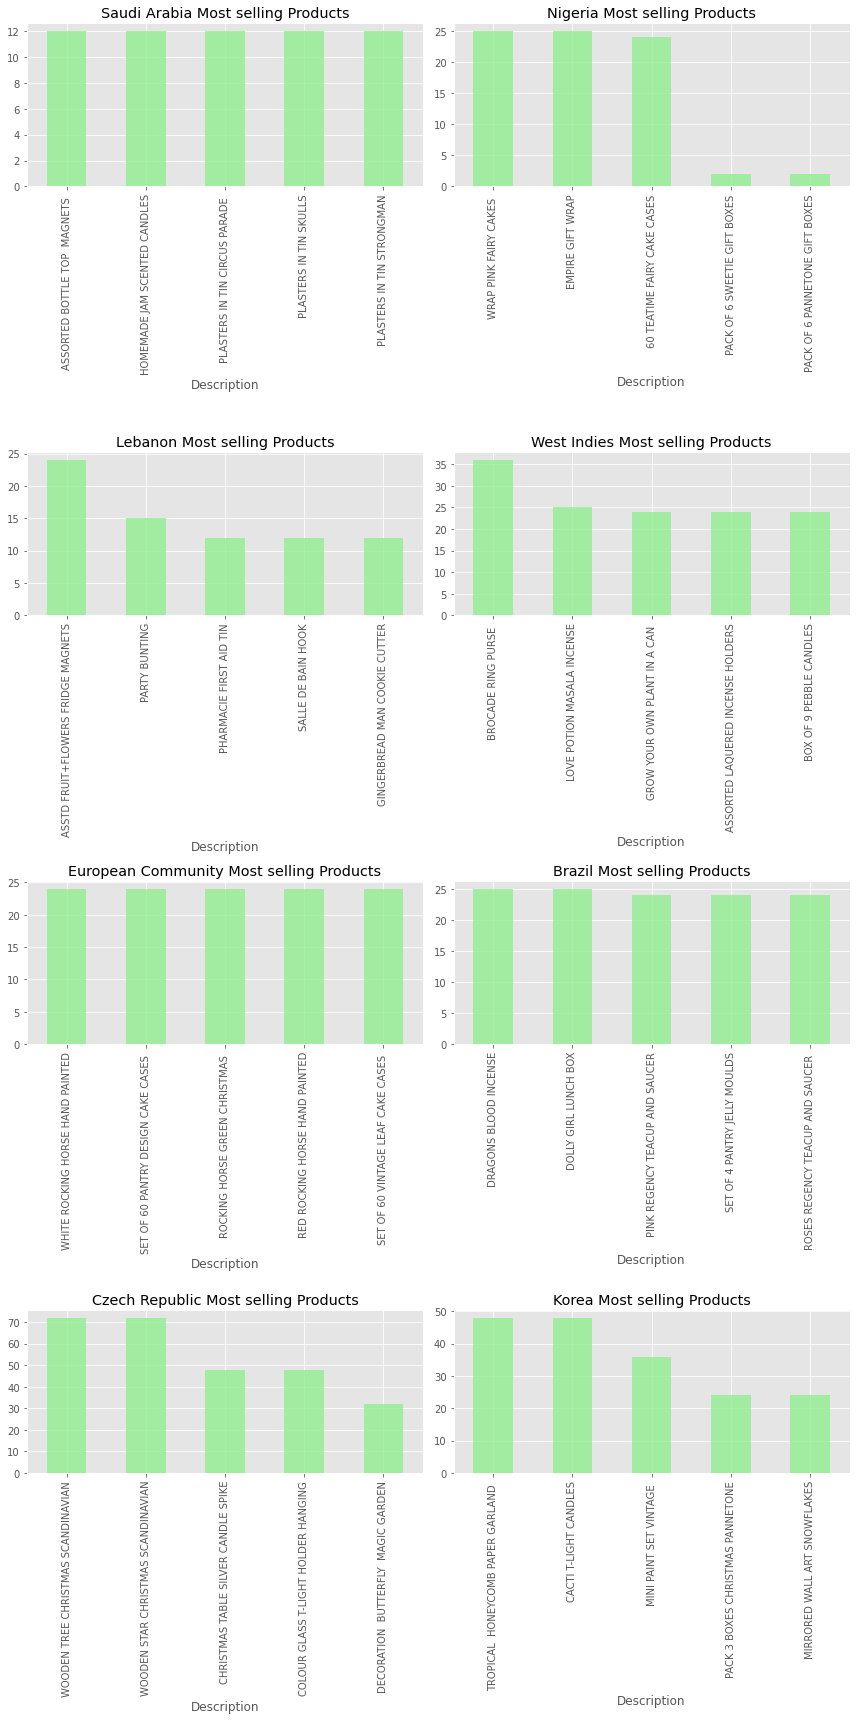

In [48]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(least_8_country):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' ' + "Most selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind="bar", ax = ax, color="lightgreen", 
                                                                                         alpha=0.8)
    plt.tight_layout()

## EDA insights:

- Our Top 5 Best Selling Products are **World War 2 Gliders, White Hanging Heart, Assorted Colour Bird, Jumbo Bag Red, Brocade Ring**.
- Most Transactions happened in the month of November which is evident due to festive seasons.
- 2010 is the year in which we have the most transactions followed by the 2011.
- Q4 being the highest when it comes transaction.
- It also observed that in the end of the 1st week and starting of the 3rd week, people tends to buy more.
- People loves to shop on Thursday followed by Tuesday and Wednesday.

### RFM Estimation - ( Recency, Frequency, Monetary)

In [49]:
data.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [50]:
data["Total Amount"] = data["Quantity"]*data["Price"]

In [51]:
data.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Total Amount  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom          83.4  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom          81.0  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom          81.0  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom         100.8  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom          30.0

In [52]:
import lifetimes
import xlrd

In [53]:
summary = lifetimes.utils.summary_data_from_transaction_data(data, "Customer ID", "InvoiceDate", "Total Amount")

In [54]:
summary.head()

frequency  recency      T  monetary_value
Customer ID                                           
12346.0           10.0    400.0  725.0      -15.468000
12347.0            7.0    402.0  404.0      717.398571
12348.0            4.0    363.0  438.0      449.310000
12349.0            4.0    717.0  735.0     1107.172500
12350.0            0.0      0.0  310.0        0.000000

In [55]:
summary.reset_index(inplace = True)

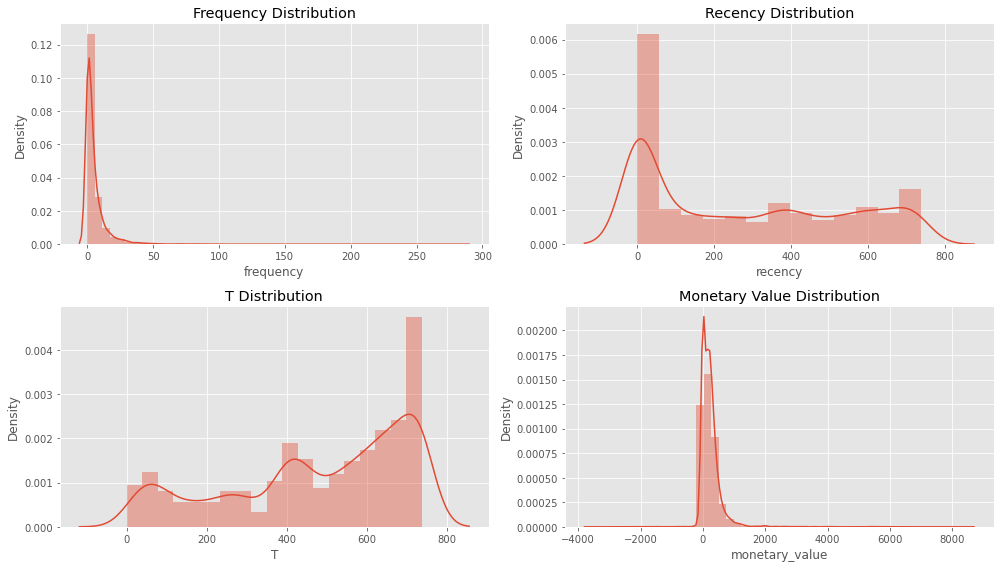

In [56]:
#ploting Distribution
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.distplot(summary["frequency"])
plt.title("Frequency Distribution")
plt.subplot(222)
sns.distplot(summary["recency"])
plt.title("Recency Distribution")
plt.subplot(223)
sns.distplot(summary["T"])
plt.title("T Distribution")
plt.subplot(224)
sns.distplot(summary["monetary_value"])
plt.title("Monetary Value Distribution")
plt.tight_layout()

Text(0.5, 1.0, 'Monetary Value')

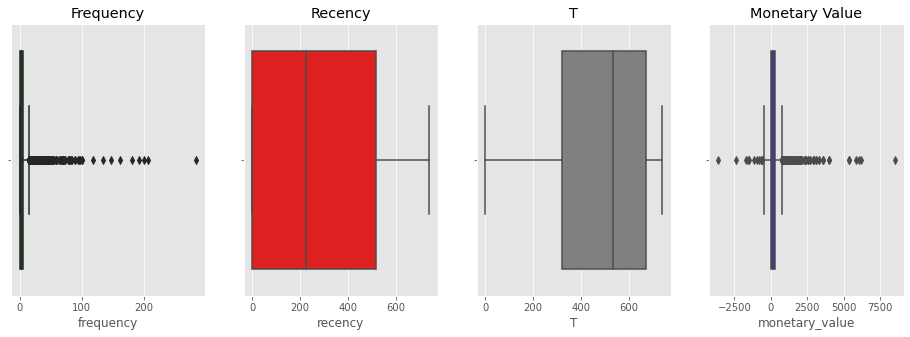

In [57]:
plt.figure(figsize=(16,5))
plt.subplot(141)
sns.boxplot(summary["frequency"], color="green")
plt.title("Frequency")
plt.subplot(142)
sns.boxplot(summary["recency"], color="red")
plt.title("Recency")
plt.subplot(143)
sns.boxplot(summary["T"], color="gray")
plt.title("T")
plt.subplot(144)
sns.boxplot(summary["monetary_value"], color="blue")
plt.title("Monetary Value")

In [58]:
summary.describe(percentiles=[0.01,0.1,0.25,0.50,0.75,0.90,0.99])

Customer ID    frequency      recency            T  monetary_value
count   5942.000000  5942.000000  5942.000000  5942.000000     5942.000000
mean   15316.500000     5.479636   275.772299   478.229384      228.814496
std     1715.451981    11.293673   259.830840   223.879537      363.067124
min    12346.000000     0.000000     0.000000     0.000000    -3610.500000
1%     12405.410000     0.000000     0.000000    15.000000      -40.623900
10%    12940.100000     0.000000     0.000000    89.000000        0.000000
25%    13831.250000     0.000000     0.000000   320.500000        0.000000
50%    15316.500000     2.000000   225.000000   536.000000      174.900625
75%    16801.750000     6.000000   518.000000   674.000000      314.594375
90%    17692.900000    13.000000   672.900000   731.000000      502.095625
99%    18227.590000    44.590000   734.000000   738.000000     1328.480453
max    18287.000000   284.000000   738.000000   738.000000     8513.271143

As we can see how are frequency changing from 90 percentile to 99 percentile but same not the case with the recency as there is no much jump in the numbers so we can cleary see from there as well as there are some extreme values contains both in the frequency and monetary value.

## Pareto / NBD Model

In [59]:
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.plotting import plot_history_alive
from lifetimes.utils import calibration_and_holdout_data
from lifetimes import ParetoNBDFitter
from sklearn.metrics import mean_squared_error, r2_score
import math
from math import sqrt

In [60]:
def get_model(data, penalizer_val, time):
    pareto_result = data.copy()
    pareto_model = ParetoNBDFitter(penalizer_coef = penalizer_val)
    pareto_model.fit(pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])
    
    # Calcualate Predicted Purchases
    t = time
    
    pareto_result["predicted_purchases"] = pareto_model.conditional_expected_number_of_purchases_up_to_time(t, pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])
    
    pareto_result["Actual_Purchases"] = pareto_result["frequency"]/pareto_result["recency"]*time
    
    #Fill the null values
    pareto_result["Actual_Purchases"].fillna(0, inplace=True)
    
    #calculate the error
    pareto_result["Prediction_Error"] = pareto_result["Actual_Purchases"]-pareto_result["predicted_purchases"]
    
    #calculate the purchase prediction error
    pareto_mse_purchase = mean_squared_error(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"])
    pareto_r2_purchase = r2_score(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"])
    pareto_rmse_purchase = sqrt (mean_squared_error(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"]))
    pareto_avg_purchase = pareto_result["predicted_purchases"].mean()
    
    #print the purchase prediction error
    print("Predicted Purchase Mean Squered Error: %s " %(pareto_mse_purchase))
    print("Predicted Purchase R2 Score: %s " %(pareto_mse_purchase))
    print("Predicted Purchase Root Means Squered Error : %s" %(pareto_rmse_purchase))
    print("Predicted Purchase Average Purchase Error : %s" %(pareto_avg_purchase))
    
    #ploting the prediction v/s actual purchase plot
    plt.figure(figsize=(6,4))
    plt.errorbar(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"], yerr=pareto_result["Prediction_Error"], 
                 fmt='o', color='blue', ecolor='red', elinewidth=1.5, capsize=0, alpha=0.2)
    plt.title("Prediction v/s Actual")

Predicted Purchase Mean Squered Error: 4.335934568785449 
Predicted Purchase R2 Score: 4.335934568785449 
Predicted Purchase Root Means Squered Error : 2.0822907022760893
Predicted Purchase Average Purchase Error : 0.3075573271154036


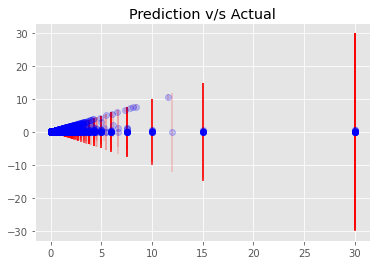

In [61]:
get_model(summary, 0.001, 30)

Based on the above errors, we have found that penalizer_coef = 0.1 is doing slightly better at minimizing the erroes so we will be using 0.1 for our model.

In [62]:
pareto_model = lifetimes.ParetoNBDFitter(penalizer_coef=0.1)

In [63]:
pareto_model.fit(summary["frequency"], summary["recency"], summary["T"])

<lifetimes.ParetoNBDFitter: fitted with 5942 subjects, alpha: 63.87, beta: 124.21, r: 0.83, s: 0.16>

<AxesSubplot:title={'center':'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

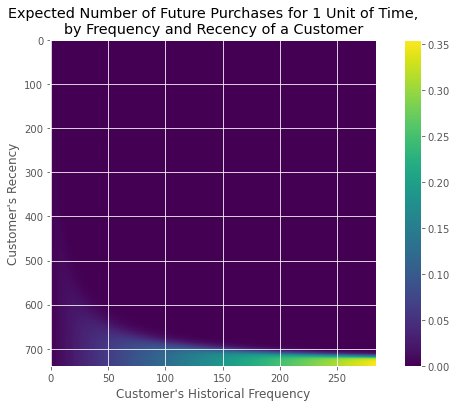

In [64]:
plt.figure(figsize=(10,6))
plot_frequency_recency_matrix(pareto_model)

<AxesSubplot:title={'center':'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

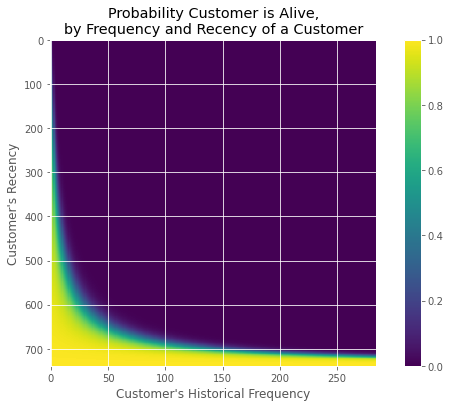

In [65]:
plt.figure(figsize=(10,6))
plot_probability_alive_matrix(pareto_model)

In [66]:
pareto_result = summary.copy()

In [67]:
pareto_result["p_not_alive"] = 1-pareto_model.conditional_probability_alive(pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])
pareto_result["p_alive"] = pareto_model.conditional_probability_alive(pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])

In [68]:
pareto_result.head()

Customer ID  frequency  recency      T  monetary_value  p_not_alive  \
0      12346.0       10.0    400.0  725.0      -15.468000     0.819891   
1      12347.0        7.0    402.0  404.0      717.398571     0.000634   
2      12348.0        4.0    363.0  438.0      449.310000     0.034895   
3      12349.0        4.0    717.0  735.0     1107.172500     0.003674   
4      12350.0        0.0      0.0  310.0        0.000000     0.334744   

    p_alive  
0  0.180109  
1  0.999366  
2  0.965105  
3  0.996326  
4  0.665256

In [69]:
t = 30
pareto_result["predicted_purchases"] = pareto_model.conditional_expected_number_of_purchases_up_to_time(t, pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])

In [70]:
pareto_result

Customer ID  frequency  recency      T  monetary_value  p_not_alive  \
0         12346.0       10.0    400.0  725.0      -15.468000     0.819891   
1         12347.0        7.0    402.0  404.0      717.398571     0.000634   
2         12348.0        4.0    363.0  438.0      449.310000     0.034895   
3         12349.0        4.0    717.0  735.0     1107.172500     0.003674   
4         12350.0        0.0      0.0  310.0        0.000000     0.334744   
...           ...        ...      ...    ...             ...          ...   
5937      18283.0       18.0    655.0  658.0      146.405556     0.000657   
5938      18284.0        1.0      2.0  431.0      -25.000000     0.730097   
5939      18285.0        0.0      0.0  660.0        0.000000     0.523576   
5940      18286.0        2.0    247.0  723.0      362.740000     0.417540   
5941      18287.0        6.0    696.0  738.0      697.165000     0.009871   

       p_alive  predicted_purchases  
0     0.180109             0.073997  
1     0.999366             0.499741  
2     0.965105             0.277710  
3     0.996326             0.180374  
4     0.665256             0.044305  
...        ...                  ...  
5937  0.999343             0.779793  
5938  0.269903             0.029887  
5939  0.476424             0.016428  
5940  0.582460             0.062766  
5941  0.990129             0.252460  

[5942 rows x 8 columns]

<AxesSubplot:title={'center':'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

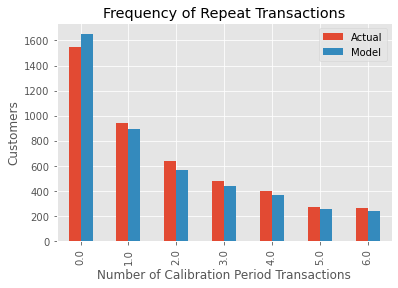

In [71]:
plot_period_transactions(pareto_model)

In [72]:
# dividing our dataset into training & holdout
pareto_summary_cal_holdout = calibration_and_holdout_data(data, "Customer ID", "InvoiceDate", 
                                                         calibration_period_end = '2011-06-08',
                                                         observation_period_end = '2011-12-09')

In [73]:
pareto_summary_cal_holdout.head()

frequency_cal  recency_cal  T_cal  frequency_holdout  \
Customer ID                                                         
12346.0               10.0        400.0  541.0                0.0   
12347.0                3.0        158.0  220.0                4.0   
12348.0                3.0        190.0  254.0                1.0   
12349.0                3.0        328.0  551.0                1.0   
12350.0                0.0          0.0  126.0                0.0   

             duration_holdout  
Customer ID                    
12346.0                 184.0  
12347.0                 184.0  
12348.0                 184.0  
12349.0                 184.0  
12350.0                 184.0

In [74]:
pareto_model.fit(pareto_summary_cal_holdout["frequency_cal"],
                pareto_summary_cal_holdout["recency_cal"],
                pareto_summary_cal_holdout["T_cal"])

<lifetimes.ParetoNBDFitter: fitted with 5025 subjects, alpha: 63.81, beta: 801.34, r: 0.83, s: 0.76>

In [75]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

<AxesSubplot:title={'center':'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

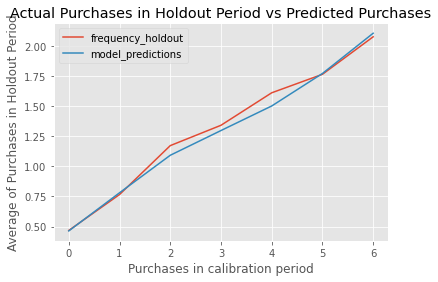

In [76]:
plot_calibration_purchases_vs_holdout_purchases(pareto_model, pareto_summary_cal_holdout)

In [77]:
pareto_summary_cal_holdout.head()

frequency_cal  recency_cal  T_cal  frequency_holdout  \
Customer ID                                                         
12346.0               10.0        400.0  541.0                0.0   
12347.0                3.0        158.0  220.0                4.0   
12348.0                3.0        190.0  254.0                1.0   
12349.0                3.0        328.0  551.0                1.0   
12350.0                0.0          0.0  126.0                0.0   

             duration_holdout  
Customer ID                    
12346.0                 184.0  
12347.0                 184.0  
12348.0                 184.0  
12349.0                 184.0  
12350.0                 184.0

In [78]:
pareto_result["actual30"] = pareto_result["frequency"]/pareto_result["recency"]*30

In [79]:
pareto_result["actual30"].fillna(0, inplace=True)

In [80]:
pareto_result["error"] = pareto_result["actual30"]-pareto_result["predicted_purchases"]

In [81]:
pareto_result.head()

Customer ID  frequency  recency      T  monetary_value  p_not_alive  \
0      12346.0       10.0    400.0  725.0      -15.468000     0.819891   
1      12347.0        7.0    402.0  404.0      717.398571     0.000634   
2      12348.0        4.0    363.0  438.0      449.310000     0.034895   
3      12349.0        4.0    717.0  735.0     1107.172500     0.003674   
4      12350.0        0.0      0.0  310.0        0.000000     0.334744   

    p_alive  predicted_purchases  actual30     error  
0  0.180109             0.073997  0.750000  0.676003  
1  0.999366             0.499741  0.522388  0.022647  
2  0.965105             0.277710  0.330579  0.052869  
3  0.996326             0.180374  0.167364 -0.013010  
4  0.665256             0.044305  0.000000 -0.044305

In [82]:
def get_metrics(true, predicted, error):
    
    print("Mean Squered Error : %s" %(mean_squared_error(true, predicted)))
    print("Root Mean Squered Error : %s" %(sqrt(mean_squared_error(true, predicted))))
    print("R2 Score : %s" %(r2_score(true, predicted)))
    
    plt.figure(figsize=(15,10))
    sns.scatterplot(true, predicted, size = error, color = "green")
    plt.title("Actual Purchase v/s Predicted Purchase")
    plt.show()

Mean Squered Error : 4.335930944167503
Root Mean Squered Error : 2.0822898319320253
R2 Score : 0.0042592953848726856


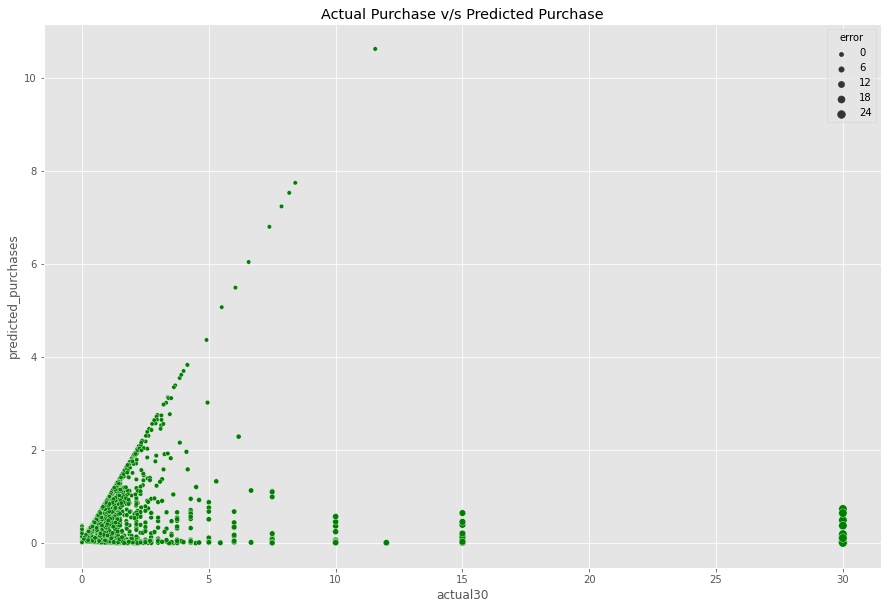

In [83]:
get_metrics(pareto_result["actual30"], pareto_result["predicted_purchases"], pareto_result["error"])

In [84]:
from lifetimes.plotting import plot_history_alive

In [85]:
# get the history alive plot to check whether the customer is alive or not

def get_history_alive(t_, data_, id_):
    
    individual_alive = data[data["Customer ID"] == id_]
    plot_history_alive(pareto_model, t=t_, transactions = individual_alive, datetime_col = "InvoiceDate", freq = "D")

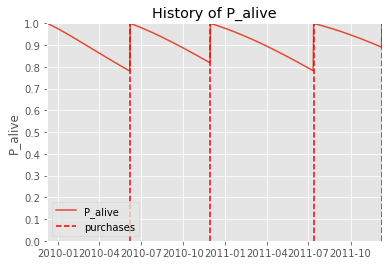

In [86]:
get_history_alive(30, data, 12358.0)

## Gamma Gamma Model

Before proceding with our Gamma Gamma model, we have to first filter the data where we are going to remove the values with 0 frequency and monetary values.

In [87]:
idx = pareto_result[(pareto_result["frequency"] <= 0.0)]

In [88]:
idx = idx.index

In [89]:
ggf_filter = pareto_result.drop(idx, axis = 0)

In [90]:
m_idx = ggf_filter[(ggf_filter["monetary_value"] <= 0.0)].index

In [91]:
ggf_filter = ggf_filter.drop(m_idx, axis = 0)

In [92]:
ggf_filter.reset_index().drop("index", axis = 1, inplace = True)

<AxesSubplot:>

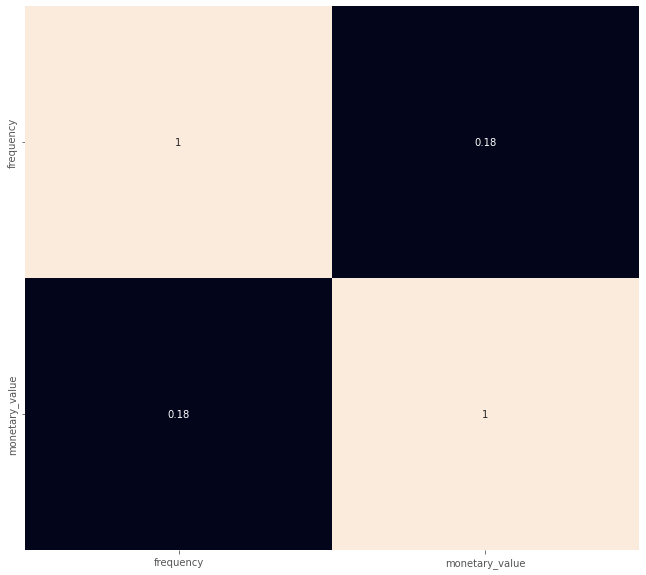

In [93]:
plt.figure(figsize=(11,10))
sns.heatmap(ggf_filter[["frequency", "monetary_value"]].corr(), annot = True, cbar = False)

In [94]:
ggf_model = lifetimes.GammaGammaFitter(penalizer_coef=0.1)

In [95]:
ggf_model.fit(ggf_filter["frequency"], ggf_filter["monetary_value"])

<lifetimes.GammaGammaFitter: fitted with 4185 subjects, p: 1.02, q: 0.19, v: 0.95>

In [96]:
ggf_model.summary

coef  se(coef)  lower 95% bound  upper 95% bound
p  1.023190  0.024652         0.974873         1.071508
q  0.185956  0.003114         0.179852         0.192060
v  0.947145  0.025498         0.897169         0.997122

In [97]:
ggf_filter["expected_avg_sales"] = ggf_model.conditional_expected_average_profit(ggf_filter["frequency"], ggf_filter["monetary_value"])

In [98]:
ggf_filter.head()

Customer ID  frequency  recency      T  monetary_value  p_not_alive  \
1      12347.0        7.0    402.0  404.0      717.398571     0.000634   
2      12348.0        4.0    363.0  438.0      449.310000     0.034895   
3      12349.0        4.0    717.0  735.0     1107.172500     0.003674   
6      12352.0        8.0    356.0  392.0      218.182500     0.017281   
7      12353.0        1.0    204.0  408.0       89.000000     0.126935   

    p_alive  predicted_purchases  actual30     error  expected_avg_sales  
1  0.999366             0.499741  0.522388  0.022647          809.543574  
2  0.965105             0.277710  0.330579  0.052869          561.160804  
3  0.996326             0.180374  0.167364 -0.013010         1382.358199  
6  0.982719             0.568668  0.674157  0.105490          242.408202  
7  0.873065             0.101370  0.147059  0.045689          440.041239

In [99]:
print("Mean Squared Error: %s" %(mean_squared_error(ggf_filter["monetary_value"], ggf_filter["expected_avg_sales"])))
print("Root Mean Squared Error: %s" %(sqrt(mean_squared_error(ggf_filter["monetary_value"], ggf_filter["expected_avg_sales"]))))
print("R2 Score: %s" %(r2_score(ggf_filter["monetary_value"], ggf_filter["expected_avg_sales"])))

Mean Squared Error: 793392.8848687756
Root Mean Squared Error: 890.7260436681839
R2 Score: -4.485799230635513


In [100]:
ggf_filter["predicted_clv"] = ggf_model.customer_lifetime_value(pareto_model, ggf_filter["frequency"], ggf_filter["recency"], ggf_filter["T"], ggf_filter["monetary_value"], time = 30, freq = 'D', discount_rate = 0.01)

In [101]:
ggf_filter[["Customer ID", "predicted_clv"]].sort_values(by = "predicted_clv", ascending = False).head(5)


Customer ID  predicted_clv
5756      18102.0  494032.814713
2300      14646.0  426704.412842
5104      17450.0  252496.065476
1810      14156.0  239242.456161
1750      14096.0  225594.539175

In [102]:
ggf_filter["profit_margin"] = ggf_filter["predicted_clv"]*0.05

In [103]:
ggf_filter.reset_index().drop("index", axis = 1, inplace = True)

In [104]:
#exporting the result to csv
ggf_filter.to_csv("customer_lifetime_value_prediction.csv")

## CUSTOMER SEGMENTATION USING PREDICTED CLV

We have calculated the CLV and deliver the same to the marketing team but now marketing team is interested to know the most profitable customers segment which they can target the deliver the best optimized campaigns.

Our work is to deliver the requested data to the marketing team & to perform the same we will be going to perform the clustering on the predicted metrics.

In [105]:
ggf_filter.head()

Customer ID  frequency  recency      T  monetary_value  p_not_alive  \
1      12347.0        7.0    402.0  404.0      717.398571     0.000634   
2      12348.0        4.0    363.0  438.0      449.310000     0.034895   
3      12349.0        4.0    717.0  735.0     1107.172500     0.003674   
6      12352.0        8.0    356.0  392.0      218.182500     0.017281   
7      12353.0        1.0    204.0  408.0       89.000000     0.126935   

    p_alive  predicted_purchases  actual30     error  expected_avg_sales  \
1  0.999366             0.499741  0.522388  0.022647          809.543574   
2  0.965105             0.277710  0.330579  0.052869          561.160804   
3  0.996326             0.180374  0.167364 -0.013010         1382.358199   
6  0.982719             0.568668  0.674157  0.105490          242.408202   
7  0.873065             0.101370  0.147059  0.045689          440.041239   

   predicted_clv  profit_margin  
1    8446.886294     422.344315  
2    3153.812357     157.690618  
3    5372.047778     268.602389  
6    2827.890024     141.394501  
7     844.422261      42.221113

In [106]:
col = ["predicted_purchases", "expected_avg_sales", "predicted_clv", "profit_margin"]

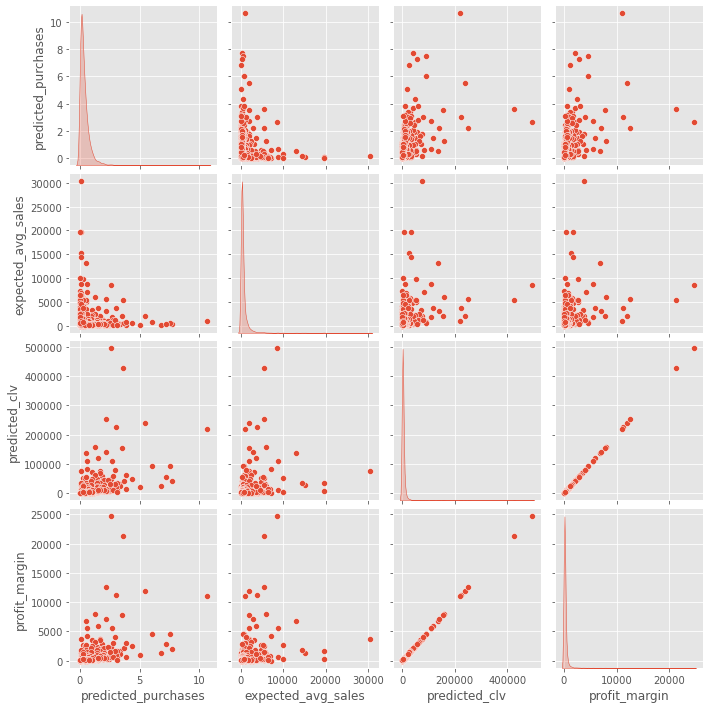

In [107]:
sns.pairplot(ggf_filter[col], diag_kind = "kde")

In [108]:
new_df = ggf_filter[col]

In [109]:
from sklearn.cluster import KMeans

In [110]:
inertia = []

for i in range(2, 11):
    cluster = KMeans(n_clusters = i, init = "k-means++").fit(new_df)
    inertia.append(cluster.inertia_)

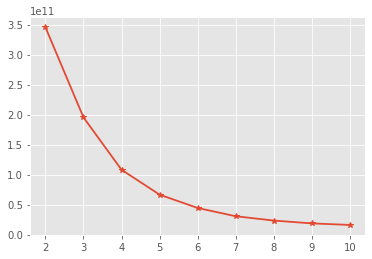

In [111]:
plt.figure(figsize=(6,4))
plt.plot(range(2,11), inertia, marker = "*", linewidth = 1.8)

In [113]:
k_model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 1000)

In [114]:
k_model_fit = k_model.fit(new_df)

In [115]:
new_df

predicted_purchases  expected_avg_sales  predicted_clv  profit_margin
1                0.499741          809.543574    8446.886294     422.344315
2                0.277710          561.160804    3153.812357     157.690618
3                0.180374         1382.358199    5372.047778     268.602389
6                0.568668          242.408202    2827.890024     141.394501
7                0.101370          440.041239     844.422261      42.221113
...                   ...                 ...            ...            ...
5935             0.080077          400.022878     630.826356      31.541318
5936             0.441465           64.211847     564.739568      28.236978
5937             0.779793          153.230929    2570.827752     128.541388
5940             0.062766          603.141334     555.630595      27.781530
5941             0.252460          803.922101    4333.592638     216.679632

[4185 rows x 4 columns]

In [116]:
centers = k_model_fit.cluster_centers_

In [117]:
centers

array([[1.63371935e+00, 2.49111257e+03, 3.38576964e+04, 1.69288482e+03],
       [3.06298105e+00, 4.60844095e+03, 1.69706586e+05, 8.48532931e+03],
       [3.59694329e-01, 5.60318094e+02, 2.98037478e+03, 1.49018739e+02],
       [3.12948129e+00, 7.02410745e+03, 4.60368614e+05, 2.30184307e+04]])

In [118]:
labels = k_model_fit.labels_

In [119]:
labels = pd.Series(labels, name = "Labels")

In [120]:
ggf_filter = pd.concat([ggf_filter, labels], axis = 1)

In [121]:
label_mapper = dict({0 : "Low", 3: "Medium", 1: "High", 2: "V_High"})

In [122]:
ggf_filter["Labels"] = ggf_filter["Labels"].map(label_mapper)

In [123]:
ggf_filter.groupby("Labels").mean().T

Labels                       High           Low  Medium        V_High
Customer ID          14634.555556  14004.174603     NaN  14452.219495
frequency                7.555556      5.666667     NaN      7.818527
recency                386.888889    387.841270     NaN    386.802281
T                      582.222222    526.507937     NaN    523.022814
monetary_value         213.589381    324.980190     NaN    338.379056
p_not_alive              0.259945      0.137224     NaN      0.156969
p_alive                  0.740055      0.862776     NaN      0.843031
predicted_purchases      0.336558      0.311828     NaN      0.405126
actual30                 0.919049      0.487807     NaN      0.760620
error                    0.582491      0.175978     NaN      0.355494
expected_avg_sales     400.052299    707.769827     NaN    632.824241
predicted_clv         2091.614657   3627.101794     NaN   4492.542913
profit_margin          104.580733    181.355090     NaN    224.627146

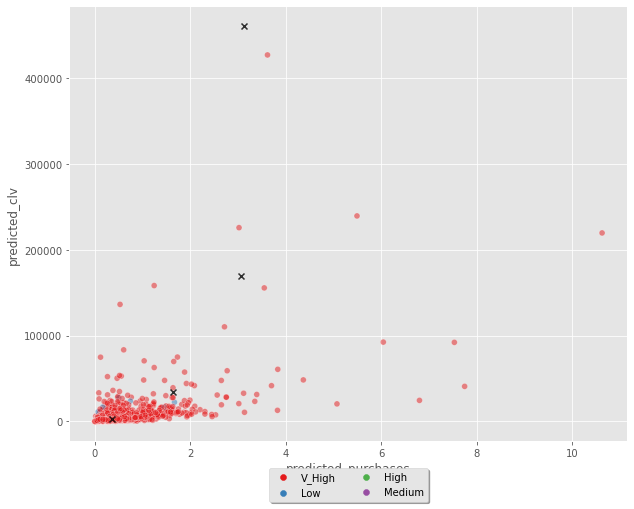

In [125]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = "predicted_purchases", y = "predicted_clv", hue = "Labels", palette = "Set1", data = ggf_filter, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 2], marker = "x", color = "k", alpha = 0.8)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

In [128]:
label_counts = ggf_filter["Labels"].value_counts()
labels = label_counts.index.tolist()

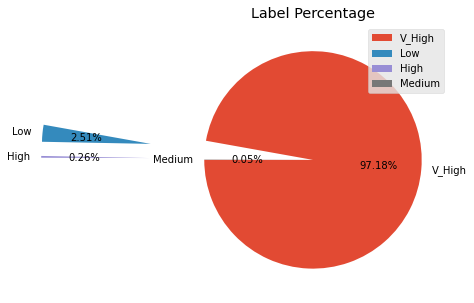

In [129]:
plt.figure(figsize=(5, 5))
plt.pie(label_counts, labels=labels, startangle=180, explode=[0.0, 1.5, 1.5, 0.0], autopct="%1.2f%%")
plt.title("Label Percentage")
plt.legend()
plt.show()

In [130]:
ggf_filter.to_csv("customer_segmentation_result.csv")

In [140]:
import pickle
import dill

In [144]:
#Saving our model - Pareto/NBD
with open('pareto_nbd.pkl', 'wb') as file:
    dill.dump(pareto_model, file)

In [145]:
#Saving our 2nd model - Gamma Model
with open('gamma_model.pkl', 'wb') as file:
    dill.dump(ggf_model, file)

In [146]:
#Saving our 3rd Model - KMeans
pickle.dump(k_model, open('k_means.pkl', 'wb'))

Now it's time to deploy our model and for that we have saved the model using the above code.